In [1]:
import numpy as np

In [2]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.
    
    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến
    
    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    pop = np.random.randint(2, size=(num_individuals, num_variables))
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return pop

In [3]:
np.random.seed(42)
pop = initialize_population(8,4)
print(pop)

[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 1 1 0]
 [1 0 1 1]
 [1 1 1 1]
 [1 1 0 0]]


In [4]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).
    
    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ###     
    value = np.sum(ind)
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return value

In [5]:
onemax(pop[5,:])

3

In [6]:
def truncation_selection(pop, pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

In [7]:
def crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất uniform crossover. 
        # Không cần cài đặt đột biến mutation.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx] 
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)


    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

In [8]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0
    
    return pop

In [9]:
def genetic_algorithm(num_individuals, num_parameters, num_generations):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([onemax(ind) for ind in pop])
    print("#Gen 0:")
    print(pop_fitness)

    selection_size = num_individuals // 2

    for i in range(num_generations):
        selected_indices = truncation_selection( pop, pop_fitness, selection_size )
        selection_set = pop[selected_indices]
        selection_fitness = pop_fitness[selected_indices]

        offspring = crossover(selection_set)
        offspring = mutation(offspring, 0.1)
        offspring_fitness = np.array([onemax(ind) for ind in offspring])

        pop = np.vstack([selection_set, offspring])
        pop_fitness = np.concatenate((selection_fitness, offspring_fitness))

        print(f'#Gen {i+1}:')
        print(pop_fitness)
    
    print('#Final result:')
    print(pop)
    print(pop_fitness)


In [10]:
num_parameters = 10
num_individuals = 16
num_generations = 10
np.random.seed(20521493)
#genetic_algorithm(num_individuals, num_parameters, num_generations)

# Cài đặt

In [11]:
def tournament_selection(pop, pop_fitness,num_individuals):
    selected_indices = []
    size = 4
    count = 0
    while (True):
      indices = np.arange(len(pop))
      np.random.shuffle(indices)
      for j in range(0,len(pop),size):
        temp_table = indices[j:j+size]
        selected_indice = np.argsort(pop_fitness[temp_table])
        selected_indices.append(temp_table[selected_indice[-1]])
        count+=1
        if (count == num_individuals):
          return selected_indices 
    
    return selected_indices

In [12]:
def POPOP(num_individuals, num_parameters, num_generations):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([onemax(ind) for ind in pop])
    print("#Gen 0:")
    print(pop_fitness)
    
    for i in range(num_generations):
        #variation
        offspring = crossover(pop)
        offspring_fitness = np.array([onemax(ind) for ind in offspring])

        #P+O Pool
        pool = np.vstack([pop, offspring])
        pool_fitness = np.concatenate((pop_fitness, offspring_fitness))

        #Tournament Selection
        selected_indices = tournament_selection( pool, pool_fitness,num_individuals)
        selection_set = pool[selected_indices]
        selection_fitness = pool_fitness[selected_indices]

        pop = selection_set
        pop_fitness = selection_fitness

        ''' print(f'#Gen {i+1}:')
        print(f"{pop_fitness}") '''
    
    print('#Final result:')
    print(pop)
    print(pop_fitness)


# num_parameters = 8

In [13]:
num_parameters = 8
num_individuals = 12
num_generations = 10
np.random.seed(20521493)
POPOP(num_individuals, num_parameters, num_generations)

#Gen 0:
[5 3 4 3 1 5 6 5 3 5 4 3]
#Final result:
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[8 8 8 8 8 8 8 8 8 8 8 8]


# num_parameters = 16

In [14]:
num_parameters = 16
num_individuals = 24
num_generations = 10
np.random.seed(20521493)
POPOP(num_individuals, num_parameters, num_generations)

#Gen 0:
[ 8  7  6 11  8  7 11 10  9 10  6  4  6  9  9  4  8  9  8  7  6  6  3  8]
#Final result:
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 1

# num_parameters = 32

In [15]:
num_parameters = 32
num_individuals = 32
num_generations = 15
np.random.seed(20521493)
POPOP(num_individuals, num_parameters, num_generations)

#Gen 0:
[15 17 15 21 19 10 15 13 17 15 12 11 19 17 13 21 12 17 13 12 15 18 19 21
 14 16 13 14 15 17 15 13]
#Final result:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32]


# num_parameters = 64

In [23]:
num_parameters = 64
num_individuals = 48
num_generations = 18
np.random.seed(20521493)
POPOP(num_individuals, num_parameters, num_generations)

#Gen 0:
[32 36 29 28 32 23 36 34 29 25 33 40 30 27 32 28 37 35 30 30 29 34 32 31
 35 35 32 27 29 27 36 29 37 21 30 33 33 42 35 32 32 27 32 29 36 26 32 31]
#Final result:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]


# num_parameters = 128

In [17]:
num_parameters = 128
num_individuals = 128
num_generations = 28
np.random.seed(20521493)
POPOP(num_individuals, num_parameters, num_generations)

#Gen 0:
[68 57 55 70 54 73 57 60 72 60 63 63 70 59 56 65 58 63 75 67 59 61 62 63
 63 63 65 74 70 53 64 66 70 67 71 57 61 64 67 67 70 59 67 55 57 52 67 56
 69 66 56 64 66 63 67 67 68 65 66 61 50 75 68 62 71 65 65 58 55 62 58 54
 63 72 72 68 59 56 53 69 67 64 60 76 67 60 63 71 74 57 59 70 52 64 55 70
 70 53 63 60 65 60 64 62 59 77 59 65 62 59 65 67 68 65 64 54 77 64 62 61
 69 62 59 66 57 55 63 68]
#Final result:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128

Nhận xét:

# Nhận xét

* Mỗi thông số num_parameters khác nhau em đều cho chạy trên 10 lần để tránh trường hợp Gen 0 được khởi tạo quá tốt dẫn đến lời giải cho những lần chạy khác là không tối ưu.
* Thống kê các giá trị thông số : 


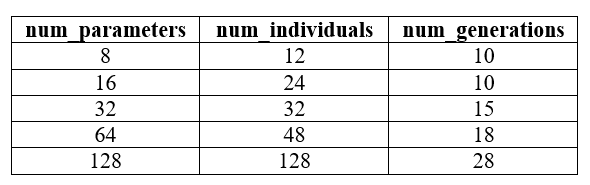



* Khi cài đặt, em thấy rằng thông số num_individuals sẽ có giá trị hầu hết là nhỏ hơn hoặc bằng giá trị num_parameters, trừ trường hợp num_parameters = 64 và num_individuals = 48.
* num_generations thường sẽ không thay đổi quá nhiều khi num_paramters tăng lên.